In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Features like "CIC0", "GATS1i", "NdssC", and "NdsCH" exhibit varying degrees of positive skewness. Particularly, "NdssC" and "NdsCH" show high skewness, which could affect the performance of linear regression models.
#### For these skewed features, applying transformations such as logarithmic, square root, or Box-Cox transformations can help in normalizing their distributions.
#### Features "MLOGP" and "SM1_Dz(Z)" are fairly symmetric and may not require transformation.

In [20]:
correct_column_names = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdssC', 'NdsCH', 'MLOGP', 'Fish Toxicity']
file_path = r"data/qsar_fish_toxicity.csv"
# Importing the data with the correct column names
df = pd.read_csv(file_path, delimiter=';', names=correct_column_names)

# Displaying the first few rows of the data
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdssC,NdsCH,MLOGP,Fish Toxicity
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


#### Handling Zero Values: The logarithm of zero is undefined because no number can be raised to any power to yield zero. Therefore, if your dataset contains zero values, directly applying a logarithmic transformation will result in mathematical errors or undefined values. By adding a constant (usually a small value like 1), you ensure that all values are positive and the logarithm is defined.

#### Dealing with Negative Values: Similarly, logarithms of negative numbers are not defined in the realm of real numbers. If your dataset includes negative values, adding a sufficient constant to make all values positive is necessary before applying the logarithm.

#### Stabilizing Variance and Normalizing Distributions: Log transformations are often used to stabilize variance and normalize distributions, especially for skewed data. However, skewed data can include zero or near-zero values, which would be problematic for log transformations. Adding a constant helps to mitigate this issue.

#### Improving Model Interpretation: In certain types of models, especially those involving exponential growth or decay (like some financial models), adding a constant before taking the logarithm can make the model easier to interpret.

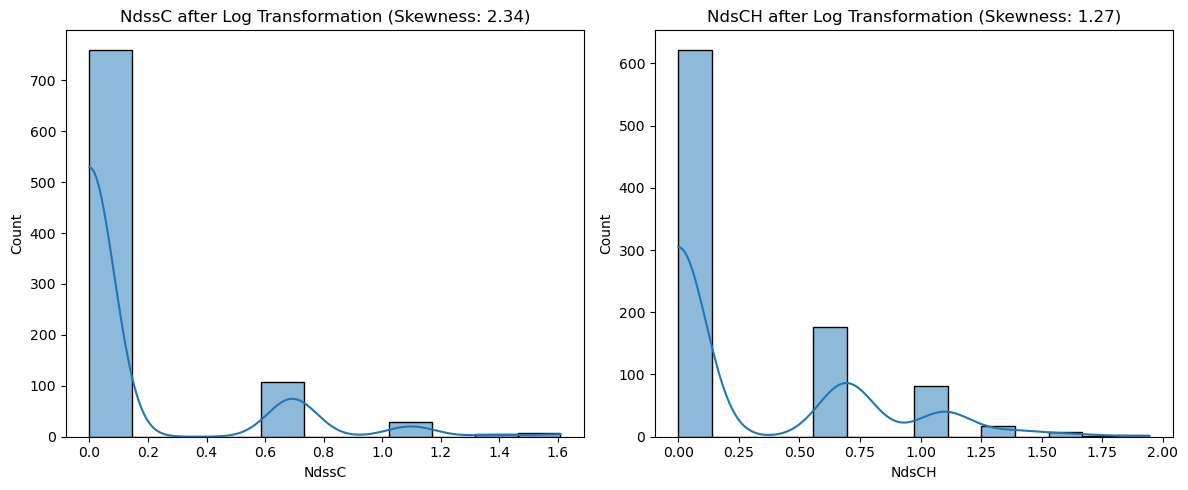

NdssC    2.344589
NdsCH    1.266839
dtype: float64

In [21]:
# Applying log transformation to 'NdssC' and 'NdsCH' to reduce skewness
# Adding a small constant to avoid log(0) which is undefined, this why we add the constant
data_transformed = df.copy()
data_transformed['NdssC'] = np.log(data_transformed['NdssC'] + 1)  # Log transformation
data_transformed['NdsCH'] = np.log(data_transformed['NdsCH'] + 1)  # Log transformation

# Recalculating skewness for the transformed features
transformed_skewness = data_transformed[['NdssC', 'NdsCH']].skew()

# Plotting histograms for the transformed features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_transformed['NdssC'], kde=True)
plt.title(f'NdssC after Log Transformation (Skewness: {transformed_skewness["NdssC"]:.2f})')

plt.subplot(1, 2, 2)
sns.histplot(data_transformed['NdsCH'], kde=True)
plt.title(f'NdsCH after Log Transformation (Skewness: {transformed_skewness["NdsCH"]:.2f})')

plt.tight_layout()
plt.show()

transformed_skewness


#### The log transformation has helped in reducing the skewness of both "NdssC" and "NdsCH", making their distributions more symmetric. However, "NdssC" still shows a relatively high skewness, suggesting that further transformation or a different approach (like Box-Cox transformation) might be necessary.
#### For "NdsCH", the skewness is considerably reduced, indicating that the log transformation was more effective for this feature.
#### It's important to note that the choice of transformation depends on the nature of the data and the specific requirements of the modeling technique being used. For linear regression models, achieving near-normal distributions in the predictors can improve model performance and the validity of statistical tests.

In [22]:
data_transformed.to_csv("data/fish_transformed.csv",index=False)

In [23]:
pd.read_csv('data/fish_transformed.csv')

,CIC0,SM1_Dz(Z),GATS1i,NdssC,NdsCH,MLOGP,Fish Toxicity
0,3.260,0.829,1.676,0.000000,0.693147,1.453,3.770
1,2.189,0.580,0.863,0.000000,0.000000,1.348,3.115
2,2.125,0.638,0.831,0.000000,0.000000,1.348,3.531
3,3.027,0.331,1.472,0.693147,0.000000,1.807,3.510
4,2.094,0.827,0.860,0.000000,0.000000,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0.000000,1.098612,0.736,3.109
904,3.652,0.872,0.867,1.098612,1.386294,3.983,4.040
905,3.763,0.916,0.878,0.000000,1.945910,2.918,4.818
906,2.831,1.393,1.077,0.000000,0.693147,0.906,5.317
